# Simulación en R aplicada a\\ la Ley de los Grandes Números y\\ Teorema Central del Límite

|       Nombre      | Libreta |
|:-----------------:|:-------:|
| Florencia Zanollo |  934/11 |
| Christian Murga   |  982/12 |

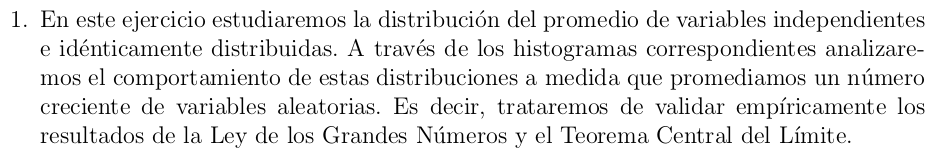

In [2]:
#semilla
set.seed(1234)

#librerias utilizadas
library(ggplot2)

#funciones auxiliares
make_histogram = function(datos){
    df = data.frame(x = datos)
    ggplot(df, aes(x)) + geom_histogram(binwidth=0.09, color="black", fill="white")
}

## a) 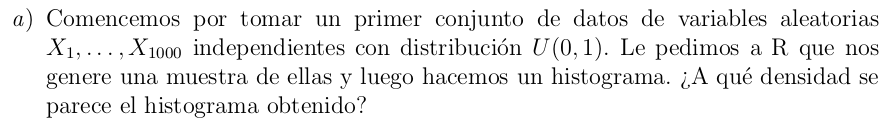

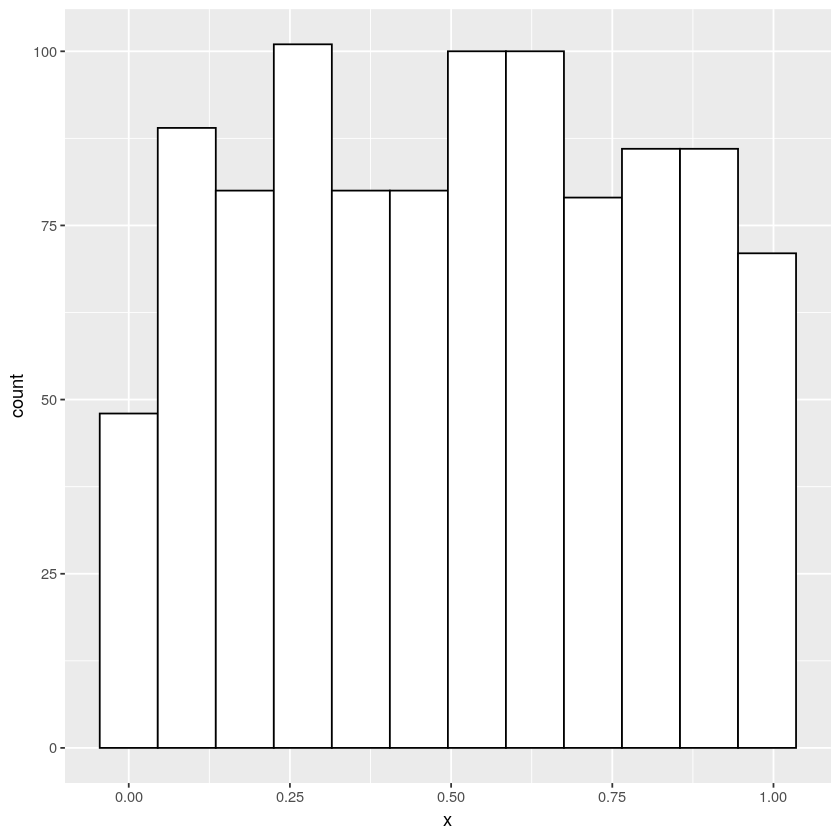

In [3]:
a_datos = runif(1000)
make_histogram(a_datos)

Tiene pinta de... Uniforme medio mordida?

## b) 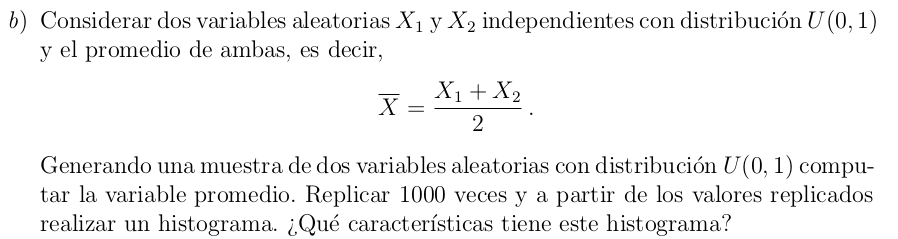

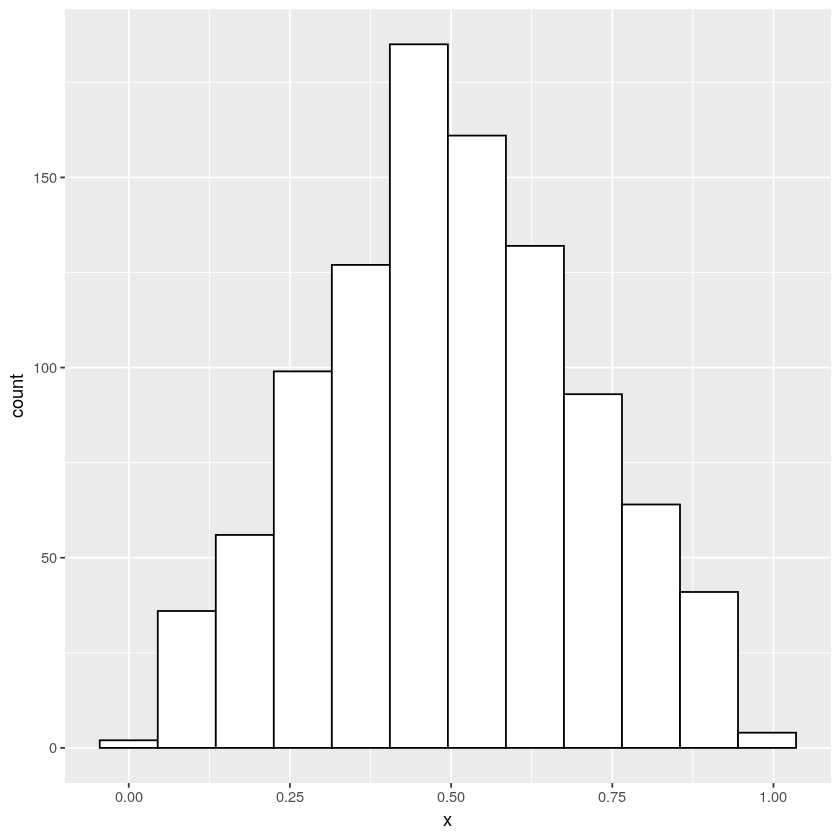

In [4]:
b_datos = replicate(1000, {mean(runif(2))})
make_histogram(b_datos)

## c) 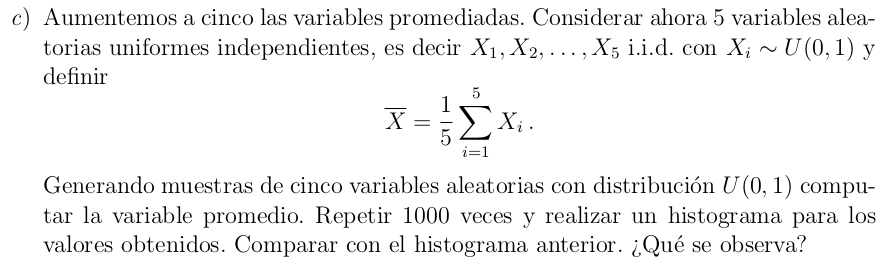

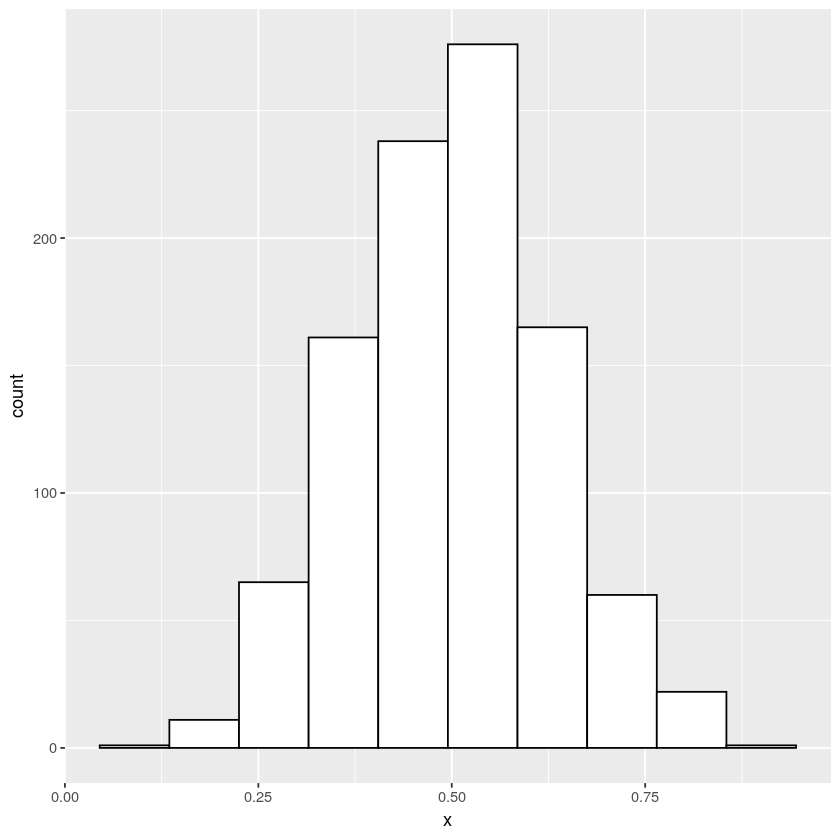

In [5]:
c_datos = replicate(1000, {mean(runif(5))})
make_histogram(c_datos)

## d) 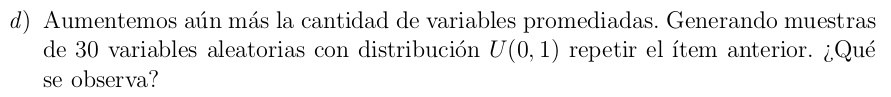

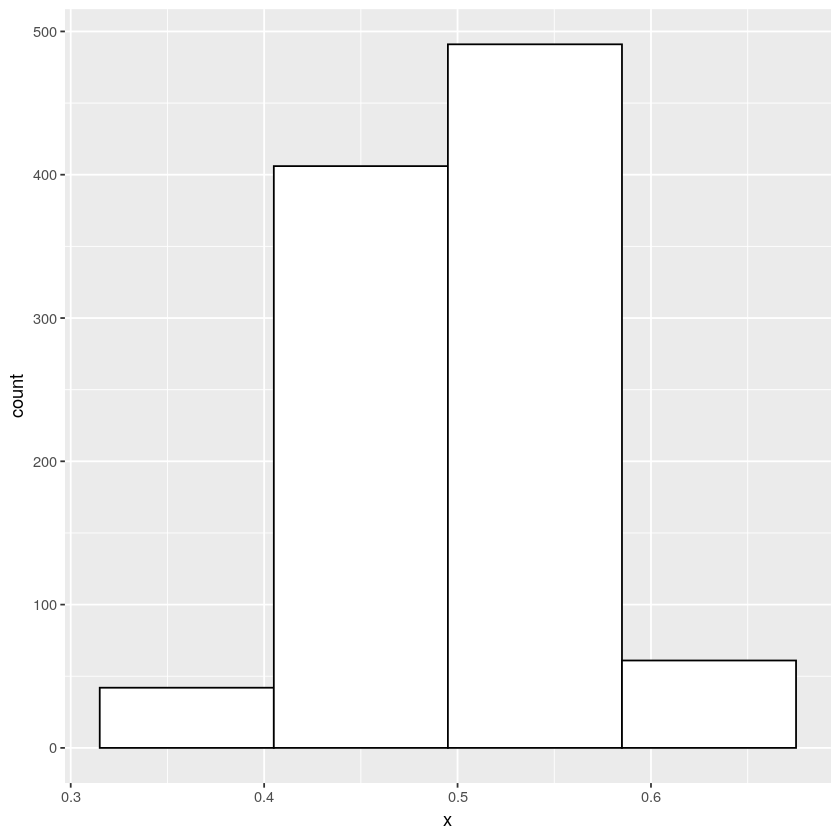

In [6]:
d_datos = replicate(1000, {mean(runif(30))})
make_histogram(d_datos)

Que se observa?

## e) 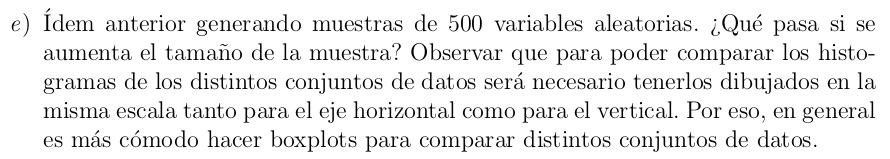

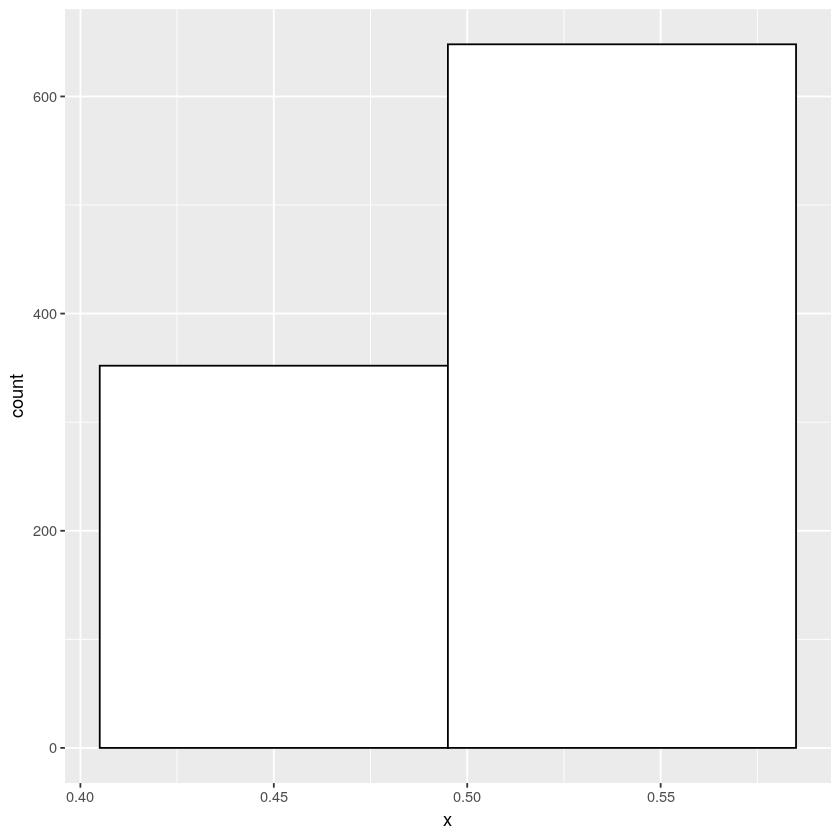

In [7]:
e_datos = replicate(1000, {mean(runif(500))})
make_histogram(e_datos)

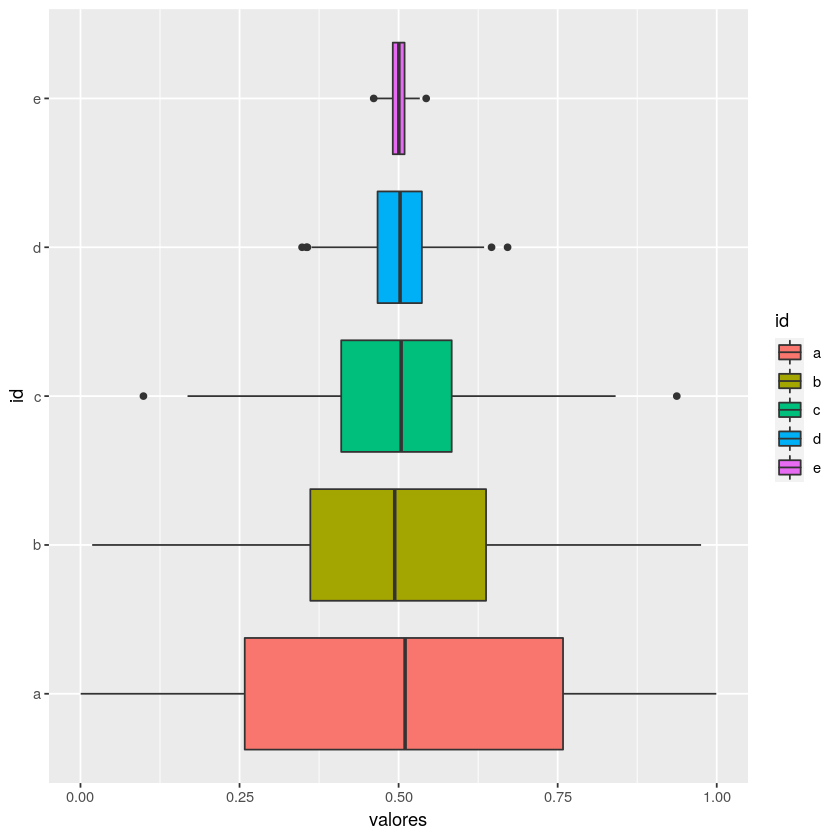

In [8]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos), id=rep(c('a','b','c','d','e'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip()

## f) 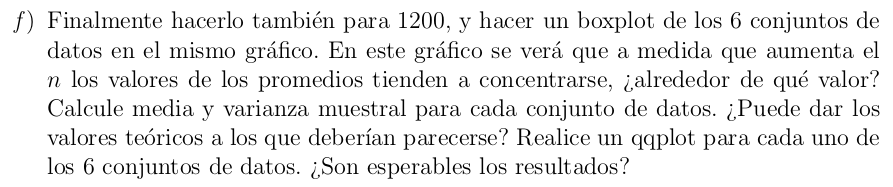

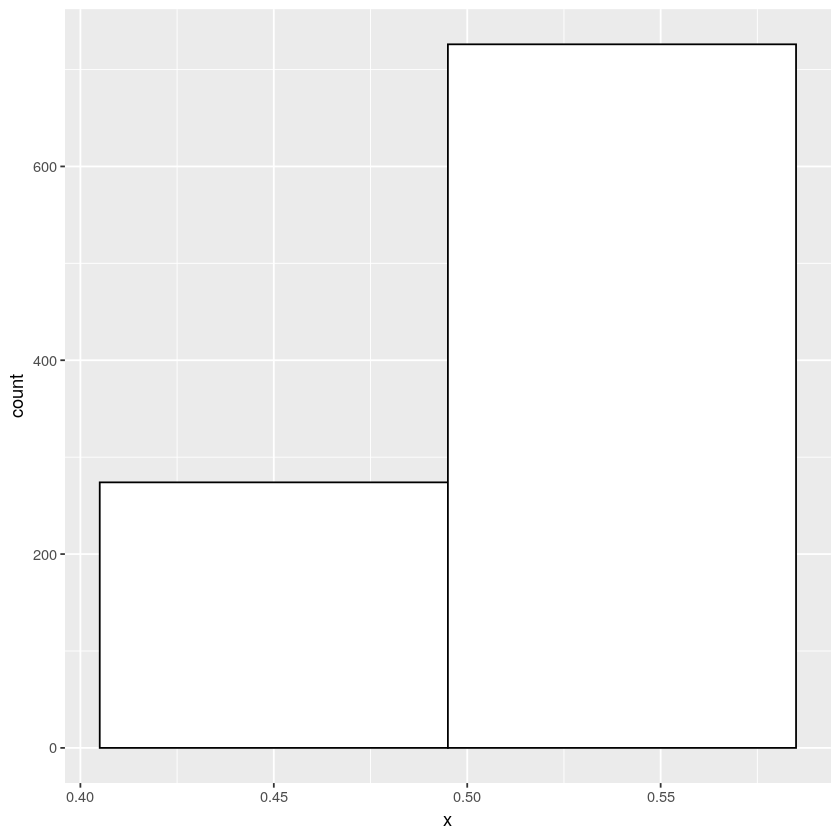

In [9]:
f_datos = replicate(1000, {mean(runif(1200))})
make_histogram(f_datos)

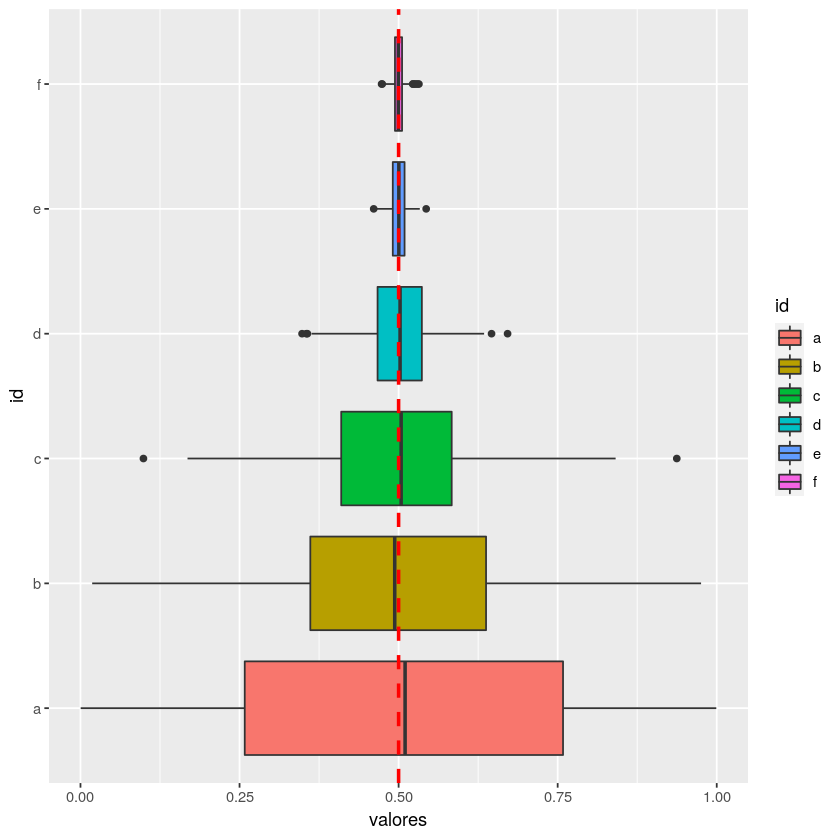

In [72]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos, f_datos), id=rep(c('a','b','c','d','e','f'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip() + geom_hline(yintercept = 0.5, linetype="dashed", color = "red", size=1)

Se concentran alrededor de 0.5

TODO: Calcule media y varianza muestral para cada conjunto de datos. ¿Puede dar los
valores teóricos a los que deberı́an parecerse? Realice un qqplot para cada uno de
los 6 conjuntos de datos. ¿Son esperables los resultados?

In [41]:
for (ej in unique(dat$id)){
    obs = dat[dat$id==ej,]$valores
    cat('Ejercicio ', ej, '\n')
    cat('\tmedia muestral: ', mean(obs), '\n')
    cat('\tvarianza muestral: ', var(obs), '\n')
}

#TODO sacar los teoricos y compararlos de alguna manera (o se supone que con el qqplot esta?)

Ejercicio  a 
	media muestral:  0.5072735 
	varianza muestral:  0.08480223 
Ejercicio  b 
	media muestral:  0.4990225 
	varianza muestral:  0.04016331 
Ejercicio  c 
	media muestral:  0.500426 
	varianza muestral:  0.01623092 
Ejercicio  d 
	media muestral:  0.5009557 
	varianza muestral:  0.002792075 
Ejercicio  e 
	media muestral:  0.5000568 
	varianza muestral:  0.000167577 
Ejercicio  f 
	media muestral:  0.4996786 
	varianza muestral:  6.876292e-05 


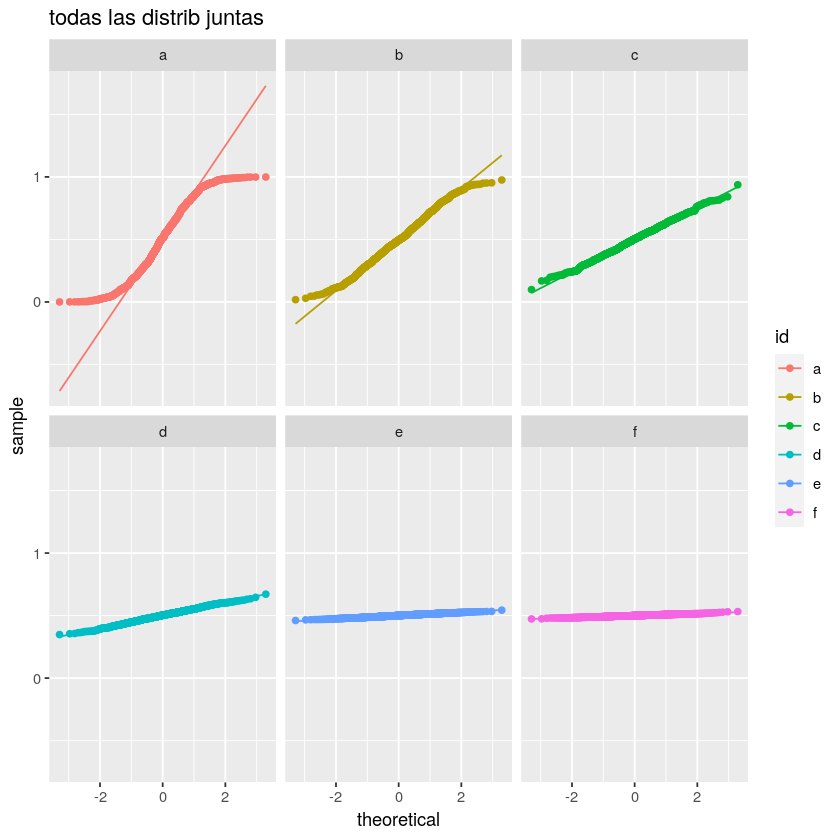

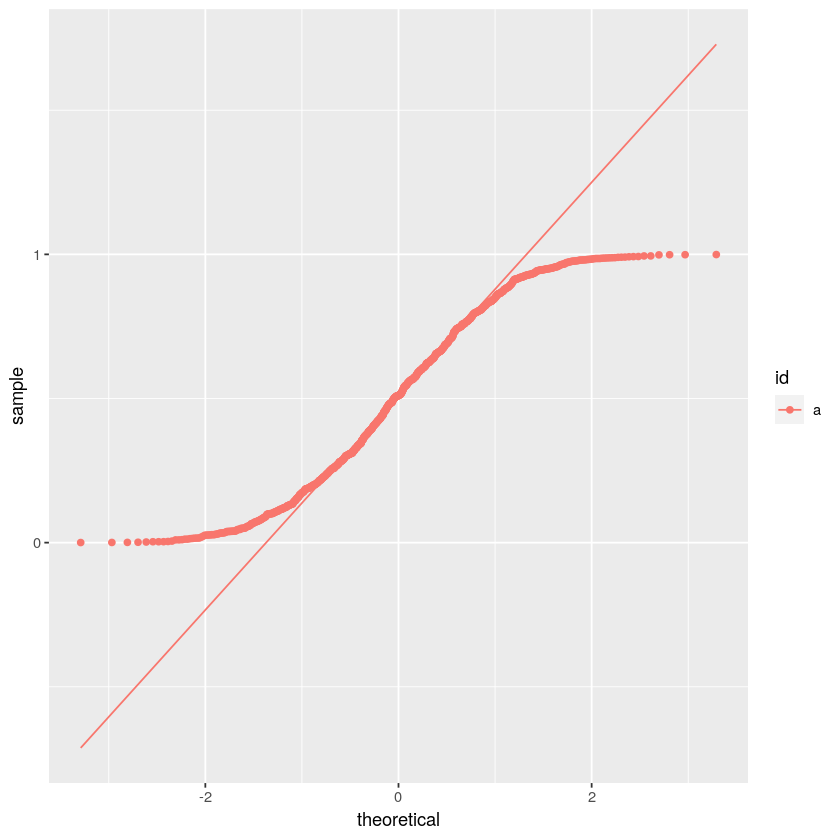

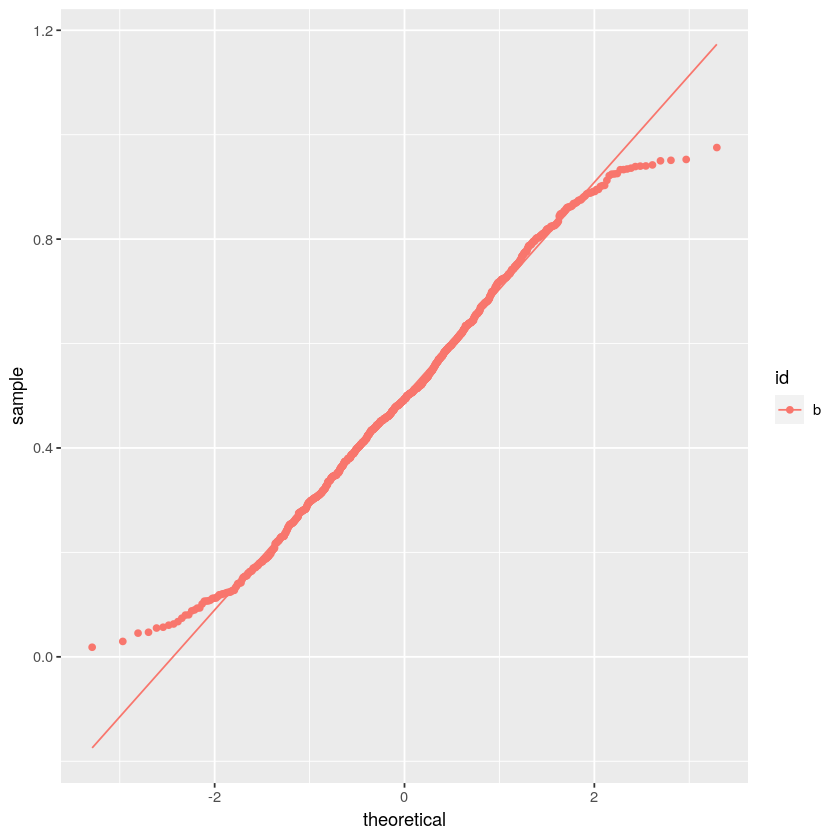

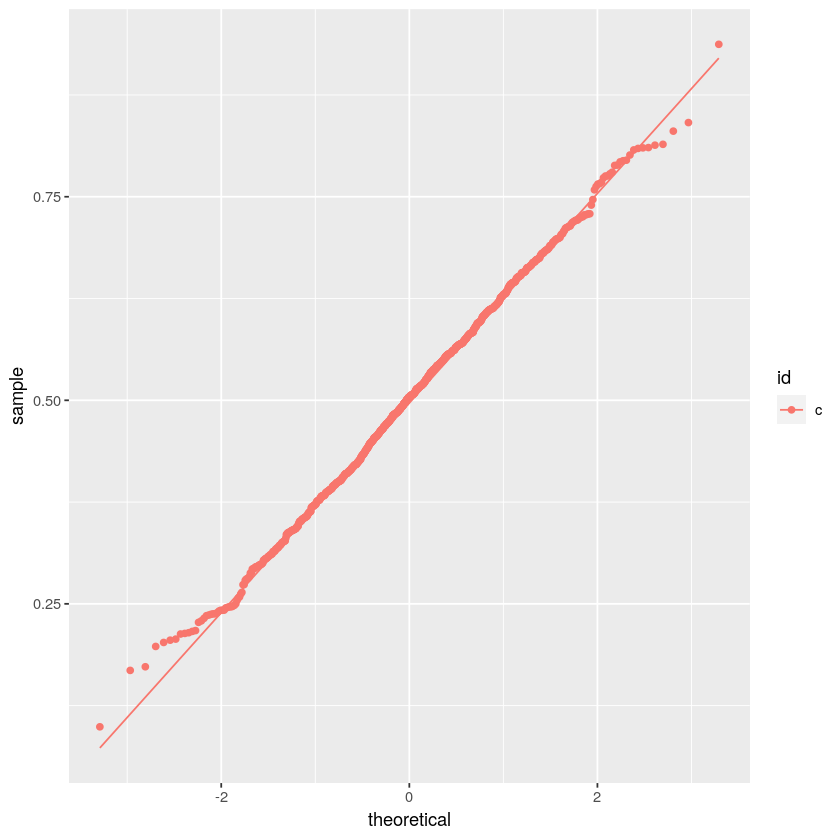

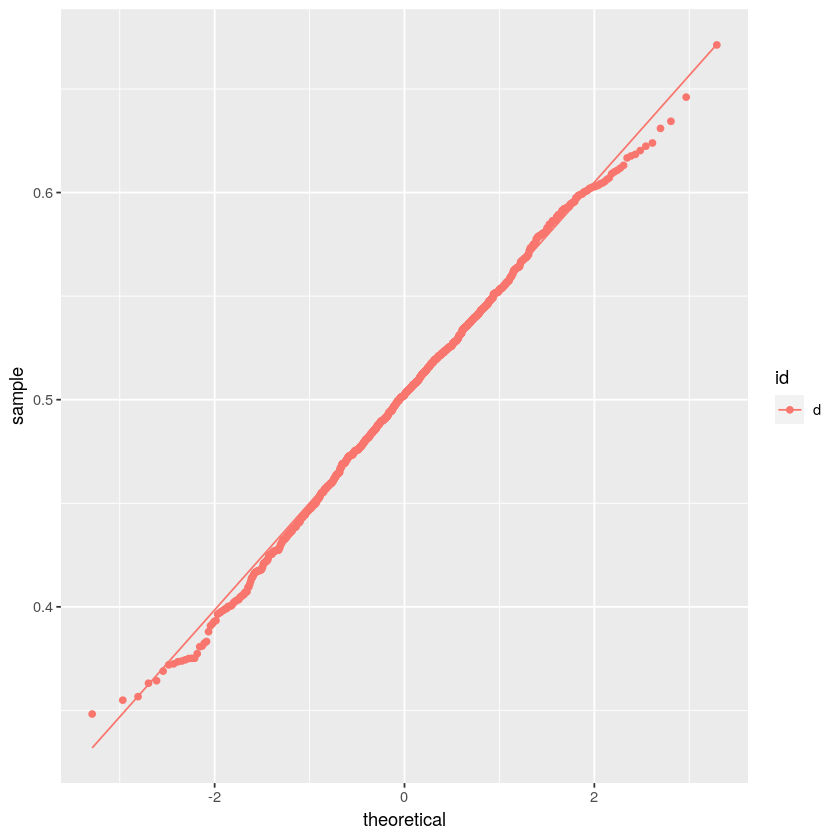

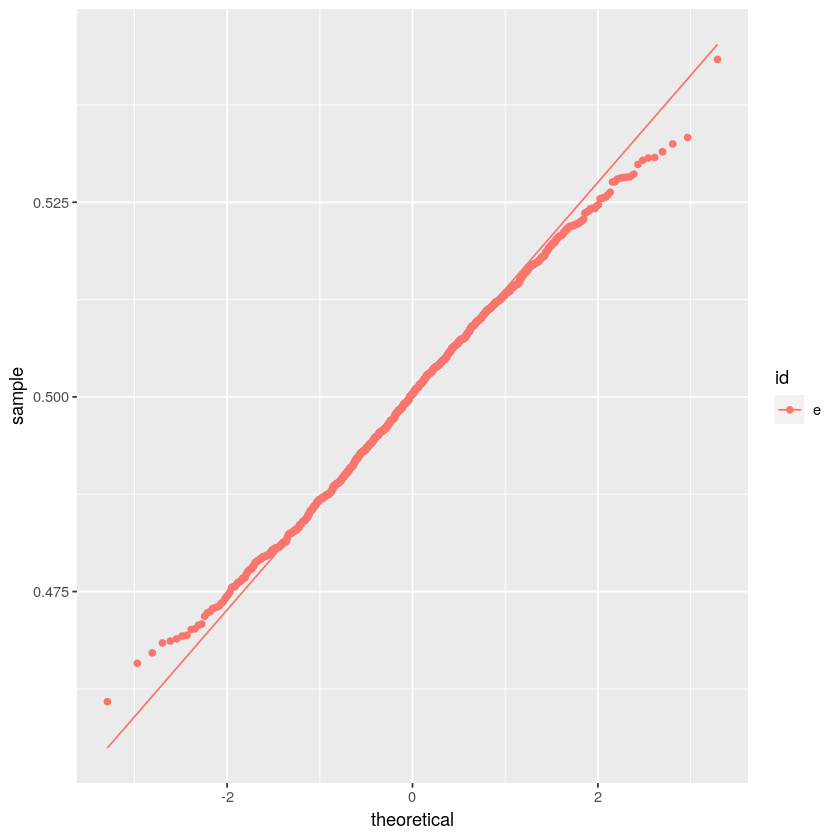

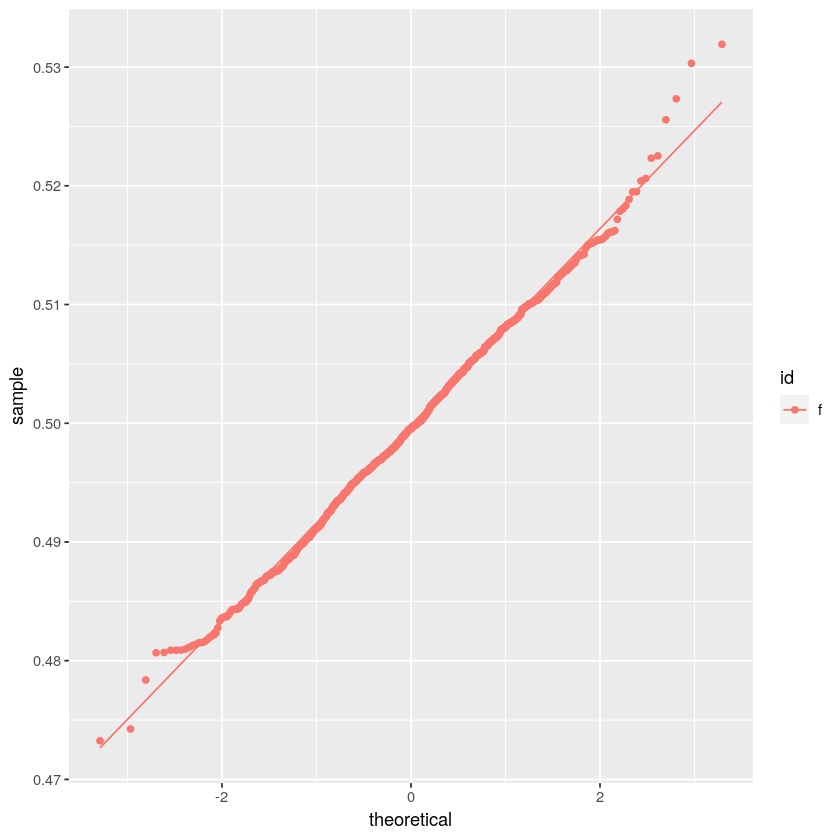

In [35]:
p <- ggplot(dat, aes(sample=valores, color=id))
p + stat_qq() + stat_qq_line()  + facet_wrap(~ id) + ggtitle("todas las distrib juntas")

for (ej in unique(dat$id)) {
    print(ggplot(dat[dat$id==ej,], aes(sample=valores, color=id)) + stat_qq() + stat_qq_line())
}

## g) 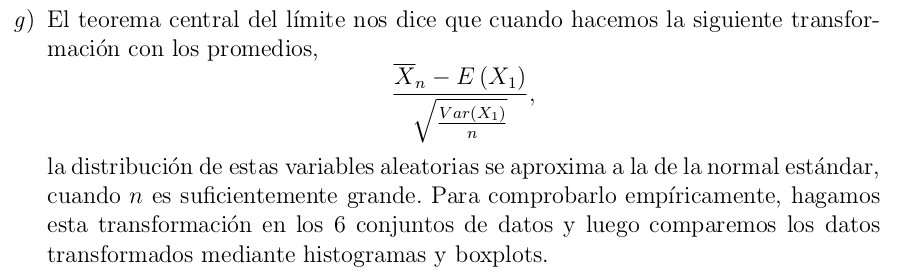

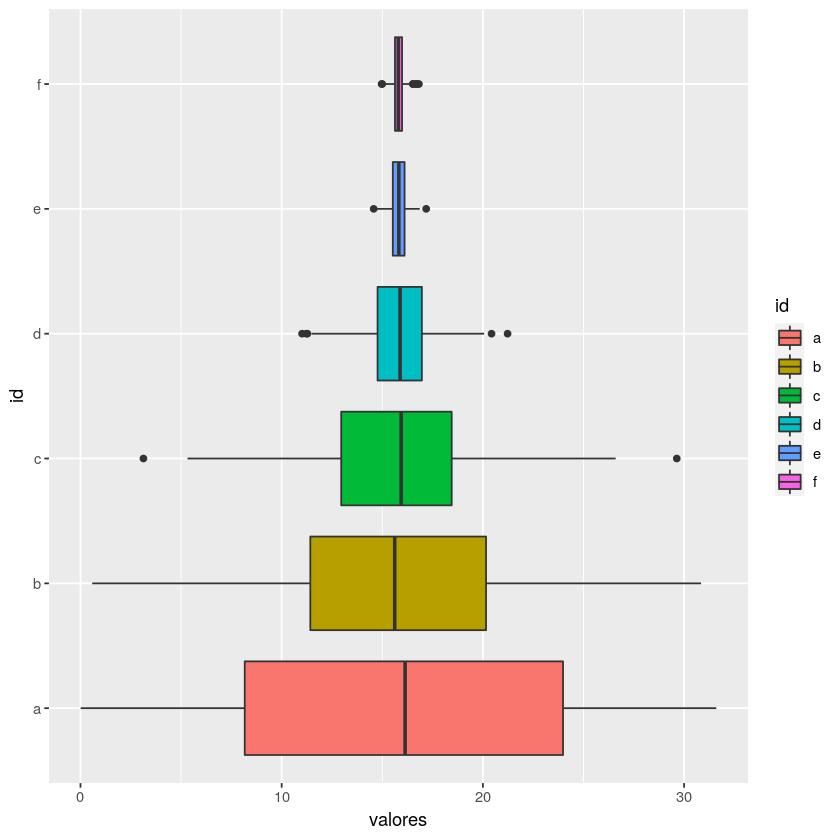

In [66]:
normalizar = function(obs){
    (obs - 0) / sqrt(1/1000) # las esperanzas y varianzas son las mismas para todos no?
}

dat_normalizados = dat
dat_normalizados[1] = lapply(dat_normalizados[1], normalizar)

ggplot(dat_normalizados, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip()

## h) 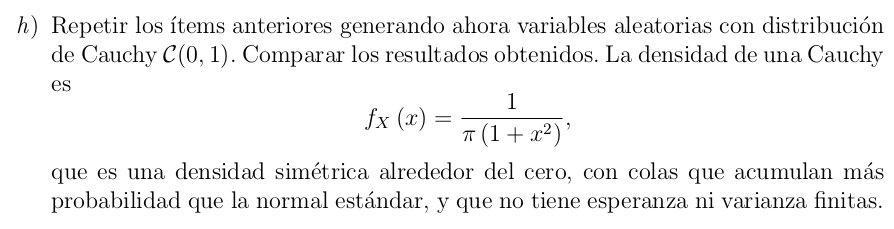